全国の雲量を可視化したい

In [144]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import xarray as xr
import cartopy.crs as crs
import datetime as dt
import japanize_matplotlib
from PIL import Image
import glob
import os
import shutil

In [150]:
class PlotCloudOnJapan:
    def __init__(self, date:dt.datetime):
        self.date = date

    def plot(self, hour: int, isgif=False):
        # データを読み込む
        ds = xr.open_dataset(f"../data/{self.date.year}/{str(self.date.month).zfill(2)}/{self.date.year}_{str(self.date.month).zfill(2)}{str(self.date.day).zfill(2)}.nc")

        # もしも時間指定があった時はそっちを優先
        if hour:
            self.date = self.date.replace(hour=hour)

        # dateから1時間後のdatetimeオブジェクトを生成
        end_time = self.date + dt.timedelta(hours=1)

        # データからcloudを取り出す
        cloud_array = ds.sel(time=slice(self.date, end_time))['ncld'].values[0]

        # 欠損値をマスクする
        masked_data = np.ma.masked_where(np.isnan(cloud_array), cloud_array)

        # 地図を作成する
        fig, ax = plt.subplots(facecolor="darkblue", subplot_kw={'projection': crs.PlateCarree()})
        ax.set_extent([120, 150, 20, 50], crs.PlateCarree())
        ax.coastlines(resolution='10m')

        # カラーマップを設定する
        cmap = plt.colormaps.get_cmap('Blues')

        # プロットする
        img = ax.imshow(masked_data, cmap=cmap, origin='upper', extent=[120, 150, 20, 50], transform=crs.PlateCarree())
        cbar = plt.colorbar(img, cmap=cmap, orientation='horizontal', shrink=0.8)
        cbar.set_label('Cloud Cover')

        ax.set_title(f"{self.date.year}/{self.date.month}/{self.date.day} {self.date.hour}時の雲")

        # gifにするならtmp画像として保存
        if isgif:
            return fig.savefig(f"../tmp/{self.date.year}_{str(self.date.month).zfill(2)}{str(self.date.day).zfill(2)}_{str(hour).zfill(2)}.png")
        # ただ1時間の画像としてみたいならそのまま表示
        else:
            plt.show()

    def plot_gif(self):
        ims = []
        
        # TODO
        # 1~23時までにしている範囲を引数によって変えられるようにする
        for hour in range(1,23):
            im = self.plot(hour,True)
            plt.clf()
            plt.close()
        
        # tmpフォルダのpngを読み込む
        files = sorted(glob.glob("../tmp/*.png"))
        images = list(map(lambda file : Image.open(file) , files))
        
        # gifにする
        images[0].save('../png/image.gif', save_all=True, append_images=images[1:], duration=400, loop=0)
        
        # tmpフォルダ空にする (tmpフォルダごと削除->tmpフォルダの作成をしてるから今後tmpフォルダ使うなら修正必要)
        shutil.rmtree("../tmp")
        os.mkdir("../tmp")

In [129]:
a = 1

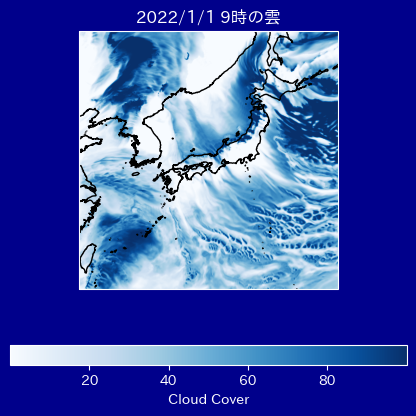

In [148]:
date = dt.datetime(2022,1,1,a)
pcoj = PlotCloudOnJapan(date)
pcoj.plot(9)

In [151]:
date = dt.datetime(2022,1,1,a)
pcoj = PlotCloudOnJapan(date)
pcoj.plot_gif()

<Figure size 640x480 with 0 Axes>

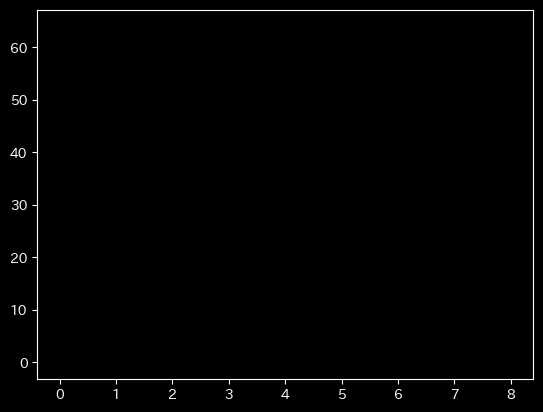

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure() #figure objectを取得．
ax = fig.add_subplot(111)

x = np.arange(0,10,1)

ims = [] #Line2D objectを入れるリストを用意
for time in range(x.shape[0]):
    im = ax.plot(x[0:time] ,x[0:time] ** 2) #Line2D objectを取得
    ims.append(im) #imsにappendする

#ArtistAnimation機能で，imsの中の画像を繋ぎ合わせる．
ani = animation.ArtistAnimation(fig, ims, interval = 100)

#imagemagickを使って，gif画像を保存
# ani.save("test.gif", writer="pillow")

In [21]:
ims

[[<matplotlib.lines.Line2D at 0x1de21c71000>],

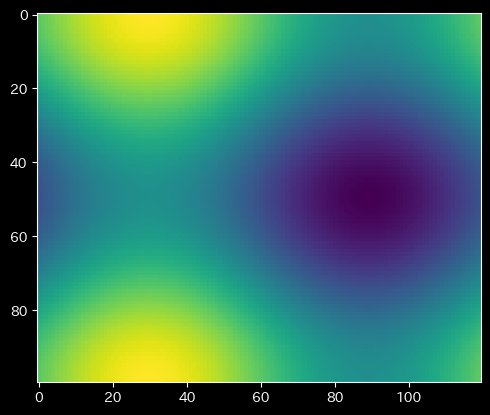

In [60]:
fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15
    y += np.pi / 30
    im = ax.imshow(f(x, y))
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

In [161]:
import sys
sys.path.append("../")

from modules.self_made_modules import PlotCloudOnJapan as pcoj

In [163]:
date = dt.datetime(2022,6,1,13)
pc = pcoj(date)
pc.plot_gif()